In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import esmtools as et
import cartopy.crs as ccrs

# Fix NPGO

In [14]:
filepath = '/glade/p/work/rbrady/EBUS_BGC_Variability/NPGO/temp_NPGO/NPGO.001.1920-2015.nc'

In [15]:
ds = xr.open_dataset(filepath)

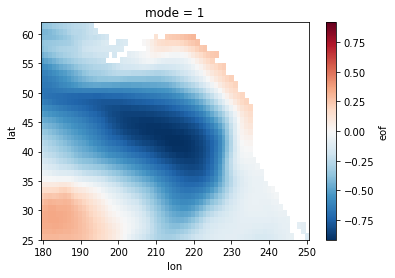

In [16]:
ds['eof'].plot()

In [11]:
ds['eof'] = ds['eof']*-1
ds['pc'] = ds['pc']*-1

In [4]:
filepath = '/glade/scratch/rbrady/EBUS_BGC_Variability/DIC_monthly_depth/DIC.002.192001-210012.nc'

In [5]:
ds = xr.open_dataset(filepath, decode_times=False)

In [9]:
data = ds['DIC']
area = ds['TAREA']

In [13]:
data = ((data*area).sum('nlat').sum('nlon'))/area.sum()

In [16]:
data['time'] = pd.date_range('1920-01', '2101-01', freq='M')
data = data.sel(time=slice('1920-01','2015-12'))
data = data.mean('time')

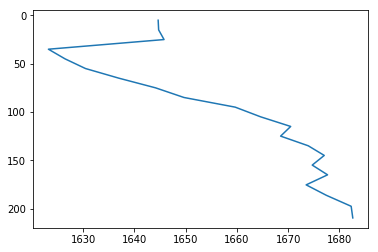

In [22]:
f, ax = plt.subplots()
plt.plot(data,data.z_t/100)
plt.gca().invert_yaxis()

In [108]:
filepath = '/glade/scratch/rbrady/TEMP.nc'
ds = xr.open_dataset(filepath, decode_times=False)

In [109]:
data = ds['DIC'].isel(time=0)

In [114]:
data = data.mean('nlat').mean('nlon')

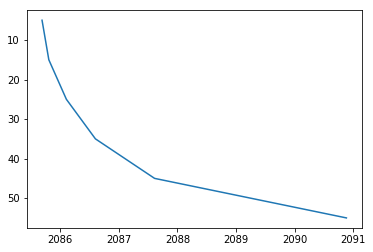